In [1]:
import nltk
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import pandas as pd

s1_e01 = pd.read_csv('scripts/s1e01.csv')

In [3]:
len(s1_e01)

475

In [20]:
s1_e01.head(15)

,Character,Line
0,Leslie Knope,hello
1,Leslie Knope,hi
2,Leslie Knope,my name is leslie knope and i work for the pa...
3,Leslie Knope,can i ask you a few questions
4,Leslie Knope,would you say that you are enjoying yourself...
5,Leslie Knope,i m gonna put a lot of fun
6,Child,ms knope there s a drunk stuck in the slide
7,Leslie Knope,sir this is a children s slide
8,Leslie Knope,you re not allowed to sleep in here
9,Extra,what is


In [6]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

s1_e01['Line'] = s1_e01.Line.map(alphanumeric).map(punc_lower)
s1_e01.head()

,Character,Line
0,Leslie Knope,hello
1,Leslie Knope,hi
2,Leslie Knope,my name is leslie knope and i work for the pa...
3,Leslie Knope,can i ask you a few questions
4,Leslie Knope,would you say that you are enjoying yourself...


In [7]:
X = s1_e01.Line
y = s1_e01.Character

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,abandoned,actual,actually,adventurous,ago,allowed,amazing,america,amphitheatre,andy,...,world,worry,wow,write,yeah,year,years,yep,yes,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

,abandoned,abandoned lot,actual,actual human,actually,actually cares,actually married,actually support,adventurous,adventurous relationships,...,year,years,years ago,years ve,yep,yep just,yes,yes park,zone,zone know
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

ValueError: too many values to unpack (expected 2)

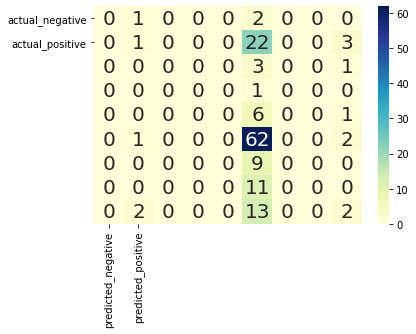

In [18]:
cm3 = conf_matrix(y_test, y_pred_cv1_nb)